In [1]:
import shap
import joblib
import pandas as pd

model = joblib.load(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\backend\resources\model_LGB.joblib")
client_id = 100001

data_test = pd.read_csv(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_test_preprocessed_vf.csv.gz",
    index_col="SK_ID_CURR")

data_train = pd.read_csv(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_train_preprocessed_vf.csv.gz",
    index_col="SK_ID_CURR")



Trying to unpickle estimator LabelEncoder from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [2]:
client_df = data_test[data_test.index == client_id]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(client_df)
expected_values = explainer.expected_value

print(expected_values)

[2.9474512818708796, -2.9474512818708796]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [3]:
shap_values

[array([[-1.46711596e-01, -5.07538082e-03, -6.25014641e-04,
         -2.97151643e-04,  7.63564190e-03, -2.58244999e-02,
          4.97789705e-02, -8.18665965e-02, -2.71566152e-02,
          1.55535622e-02, -4.73394589e-03,  3.08614403e-03,
         -2.42486219e-02, -8.28803212e-02,  0.00000000e+00,
          0.00000000e+00,  1.21067635e-02,  0.00000000e+00,
         -6.21189750e-03, -4.43217734e-04,  6.22545941e-05,
          1.51985539e-03, -5.10667947e-04,  3.97815925e-02,
          0.00000000e+00,  0.00000000e+00, -2.64625988e-05,
          7.94539378e-03, -4.12883354e-06,  4.30475640e-04,
          4.42408776e-01,  8.24262692e-01, -7.28413596e-01,
          1.11258131e-03, -1.59359435e-03, -2.07929770e-03,
         -2.47856076e-04, -6.10452862e-05,  2.27812586e-03,
          1.66048960e-03, -4.32009025e-03,  1.20385287e-04,
          7.91635436e-04,  4.93617557e-04, -8.27624951e-04,
          3.52285399e-06,  6.73608249e-04,  3.40589247e-03,
          2.30458128e-03, -1.28126765e-0

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import joblib

In [5]:
prediction = 0

In [6]:
columns = client_df.columns

In [7]:
DATA_ALL_CLIENTS_PATH = r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_train_preprocessed_vf.csv.gz"

In [8]:
columns_list = ['PAYMENT_RATE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                "AMT_ANNUITY",
                "SK_ID_CURR", "TARGET"]

In [9]:
data_all_clients = pd.read_csv(DATA_ALL_CLIENTS_PATH, encoding="utf-8", index_col="SK_ID_CURR",
                               usecols=columns_list)

In [10]:
feature_1 = 'AMT_ANNUITY'
feature_2 = 'EXT_SOURCE_2'

In [11]:
data_all_clients

,TARGET,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,PAYMENT_RATE
SK_ID_CURR,,,,,,,,
100002,1,24700.5,-9461,-637.0,0.083037,0.262949,0.139376,0.060749
100003,0,35698.5,-16765,-1188.0,0.311267,0.622246,NaN,0.027598
100004,0,6750.0,-19046,-225.0,NaN,0.555912,0.729567,0.050000
100006,0,29686.5,-19005,-3039.0,NaN,0.650442,NaN,0.094941
100007,0,21865.5,-19932,-3038.0,NaN,0.322738,NaN,0.042623
...,...,...,...,...,...,...,...,...
456251,0,27558.0,-9327,-236.0,0.145570,0.681632,NaN,0.108198
456252,0,12001.5,-20775,NaN,NaN,0.115992,NaN,0.044524
456253,0,29979.0,-14966,-7921.0,0.744026,0.535722,0.218859,0.044239


In [40]:
x_client = client_df[feature_1].iloc[0]
y_client = client_df[feature_2].iloc[0]

In [44]:
y_client

0.7896543511176771

In [43]:
client_df[feature_2]

SK_ID_CURR
100001    0.789654
Name: EXT_SOURCE_2, dtype: float64

In [69]:

def contourplot(feature_1, feature_2, client_df, client_id, df_all_clients):
    """Contour plot for the observed probability of default as a function of 2 features.
    Args :
    - feature1 (string).
    - feature2 (string).
    Returns :
    - matplotlib plot via st.pyplot.
    """
    figure = contourplot_in_common(df_all_clients, feature_1, feature_2)
    x_client = client_df[feature_1].iloc[0]
    y_client = client_df[feature_2].iloc[0]
    if str(x_client) == "nan" or str(y_client) == "nan":
        x_center = (plt.xlim()[1] + plt.xlim()[0]) / 2
        y_center = (plt.ylim()[1] + plt.ylim()[0]) / 2
        plt.text(s=f" Client {client_id}\n  data not available",
                 x=x_center,
                 y=y_center)
    else:
        plt.axvline(x=x_client,
                    ymin=-1e10,
                    ymax=1e10,
                    c='k',
                    ls='dashed',
                    lw=1)
        plt.axhline(y=y_client,
                    xmin=-1e10,
                    xmax=1e10,
                    c='k',
                    ls='dashed',
                    lw=1)
        # if I want to interpolate data : https://stackoverflow.com/questions/5666056/matplotlib-extracting-data-from-contour-lines
    #plt.show()
    #st.pyplot(figure)
    #st.caption(feature_1 + ": " + feature_description(feature_1))
    #st.caption(feature_2 + ": " + feature_description(feature_2))

In [67]:

def contourplot_in_common(df_all_clients, feature_1, feature_2):
    """Contour plot for the observed probability of default as a function of 2 features. Common to all clients.
    Args :
    - feature1 (string).
    - feature2 (string).
    Returns :
    - matplotlib figure.
    """
    target_mesh_size = 500  # target population for each mesh

    # Preparation of data
    df = pd.DataFrame({
        feature_1: df_all_clients[feature_1],
        feature_2: df_all_clients[feature_2],
        'y_true': df_all_clients["TARGET"]
    })
    df = df.dropna().copy()
    n_values = len(df)
    n_bins = int(np.ceil(np.sqrt(n_values / target_mesh_size)))
    bin_size = int(np.floor(n_values / n_bins))
    index_bin_start = sorted([bin_size * n for n in range(n_bins)])
    ser1 = df[feature_1].sort_values().copy()
    ser2 = df[feature_2].sort_values().copy()

    # Filling the grid
    grid_proba_default = np.full((n_bins, n_bins), -1.0)
    ser_true0 = (df['y_true'] == 0)
    ser_true1 = (df['y_true'] == 1)
    for i1, ind1 in enumerate(index_bin_start):
        for i2, ind2 in enumerate(index_bin_start):
            ser_inside_this_mesh = (df[feature_1] >= ser1.iloc[ind1]) & (df[feature_2] >= ser2.iloc[ind2]) & (
                        df[feature_1] <= ser1.iloc[ind1 + bin_size - 1]) & (
                                               df[feature_2] <= ser2.iloc[ind2 + bin_size - 1])
            # sum of clients true0 inside this square bin
            sum_0 = (ser_inside_this_mesh & ser_true0).sum()
            sum_1 = (ser_inside_this_mesh & ser_true1).sum()
            sum_ = sum_0 + sum_1
            if sum_ == 0:
                proba_default = 1
            else:
                proba_default = sum_1 / sum_
            grid_proba_default[i2, i1] = proba_default

    # X, Y of the grid
    X = [ser1.iloc[i + int(bin_size / 2)] for i in index_bin_start]
    Y = [ser2.iloc[i + int(bin_size / 2)] for i in index_bin_start]

    # Plotting
    plt.style.use('seaborn')
    fig = plt.figure(edgecolor='black', linewidth=4)
    plt.contourf(X, Y, grid_proba_default, cmap='Reds')
    plt.colorbar(shrink=0.8)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    fig.suptitle(
        f'Observed probability of default as a function of {feature_1} and {feature_2}',
        y=0.92)
    return fig



Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


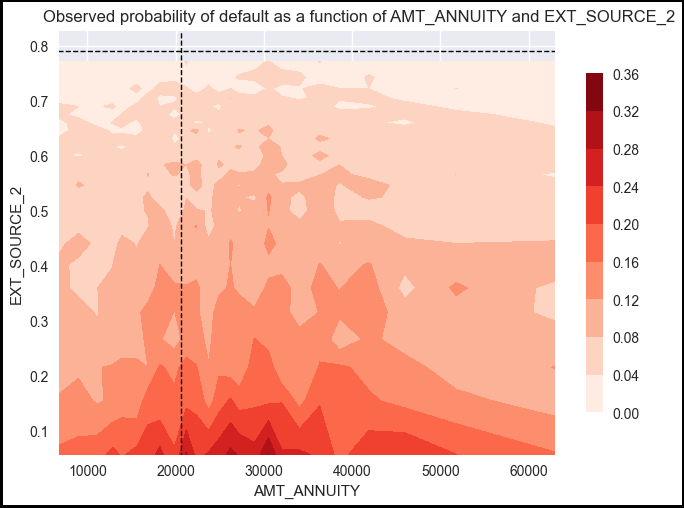

In [70]:
contourplot(feature_1, feature_2, client_df, client_id, data_all_clients)

In [12]:
target_mesh_size = 500  # target population for each mesh

In [34]:
# Preparation of data
df = pd.DataFrame({
    feature_1: data_all_clients[feature_1],
    feature_2: data_all_clients[feature_2],
    'y_true': data_all_clients["TARGET"]
})


In [26]:
df

,AMT_ANNUITY,EXT_SOURCE_2,y_true
SK_ID_CURR,,,
100002,24700.5,0.262949,1
100003,35698.5,0.622246,0
100004,6750.0,0.555912,0
100006,29686.5,0.650442,0
100007,21865.5,0.322738,0
...,...,...,...
456251,27558.0,0.681632,0
456252,12001.5,0.115992,0
456253,29979.0,0.535722,0


In [62]:
df = df.dropna().copy()

In [28]:
df

,AMT_ANNUITY,EXT_SOURCE_2,y_true
SK_ID_CURR,,,
100002,24700.5,0.262949,1
100003,35698.5,0.622246,0
100004,6750.0,0.555912,0
100006,29686.5,0.650442,0
100007,21865.5,0.322738,0
...,...,...,...
456251,27558.0,0.681632,0
456252,12001.5,0.115992,0
456253,29979.0,0.535722,0


In [63]:
n_values = len(df)
n_bins = int(np.ceil(np.sqrt(n_values / target_mesh_size)))
bin_size = int(np.floor(n_values / n_bins))
index_bin_start = sorted([bin_size * n for n in range(n_bins)])
ser1 = df[feature_1].sort_values().copy()
ser2 = df[feature_2].sort_values().copy()

In [18]:
n_values

306835

In [64]:
ser2


SK_ID_CURR
127936    8.173617e-08
289646    1.315956e-06
315717    5.002109e-06
305482    5.600338e-06
366811    5.939651e-06
              ...     
192297    8.549997e-01
274603    8.549997e-01
440711    8.549997e-01
182029    8.549997e-01
450870    8.549997e-01
Name: EXT_SOURCE_2, Length: 306835, dtype: float64

In [36]:
# Filling the grid
grid_proba_default = np.full((n_bins, n_bins), -1.0)
ser_true0 = (df['y_true'] == 0)
ser_true1 = (df['y_true'] == 1)
for i1, ind1 in enumerate(index_bin_start):
    for i2, ind2 in enumerate(index_bin_start):
        ser_inside_this_mesh = (df[feature_1] >= ser1.iloc[ind1]) & (df[feature_2] >= ser2.iloc[ind2]) & (
                df[feature_1] <= ser1.iloc[ind1 + bin_size - 1]) & (df[feature_2] <= ser2.iloc[ind2 + bin_size - 1])

        # sum of clients true0 inside this square bin
        sum_0 = (ser_inside_this_mesh & ser_true0).sum()
        sum_1 = (ser_inside_this_mesh & ser_true1).sum()
        sum_ = sum_0 + sum_1
        if sum_ == 0:
            proba_default = 1
        else:
            proba_default = sum_1 / sum_
        grid_proba_default[i2, i1] = proba_default

In [31]:
ser_inside_this_mesh

SK_ID_CURR
100002    False
100003    False
100004    False
100006    False
100007    False
          ...  
456251    False
456252    False
456253    False
456254    False
456255    False
Length: 306835, dtype: bool

In [37]:


# X, Y of the grid
X = [ser1.iloc[i + int(bin_size / 2)] for i in index_bin_start]
Y = [ser2.iloc[i + int(bin_size / 2)] for i in index_bin_start]


Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


Text(0.5, 0.92, 'Observed probability of default as a function of AMT_ANNUITY and EXT_SOURCE_2')

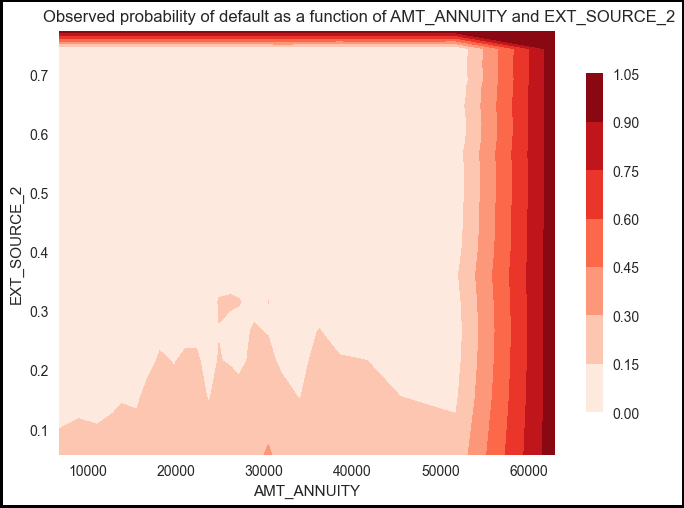

In [38]:
plt.style.use('seaborn')
fig = plt.figure(edgecolor='black', linewidth=4)
plt.contourf(X, Y, grid_proba_default, cmap='Reds')
plt.colorbar(shrink=0.8)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
fig.suptitle(
    f'Observed probability of default as a function of {feature_1} and {feature_2}',
    y=0.92)


Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


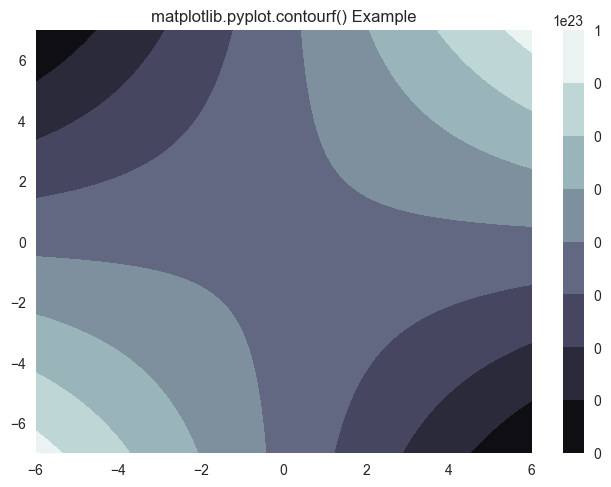

In [24]:

# Implementation of matplotlib function
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm

N = 1000
x = np.linspace(-6.0, 6.0, N)
y = np.linspace(-7.0, 7.0, N)
X, Y = np.meshgrid(x, y)

Z1 = np.exp(X * Y)
z = 50 * Z1
z[:5, :5] = -1
z = ma.masked_where(z <= 0, z)

cs = plt.contourf(X, Y, z,
                  locator=ticker.LogLocator(),
                  cmap="bone")

cbar = plt.colorbar(cs)

plt.title('matplotlib.pyplot.contourf() Example')
plt.show()

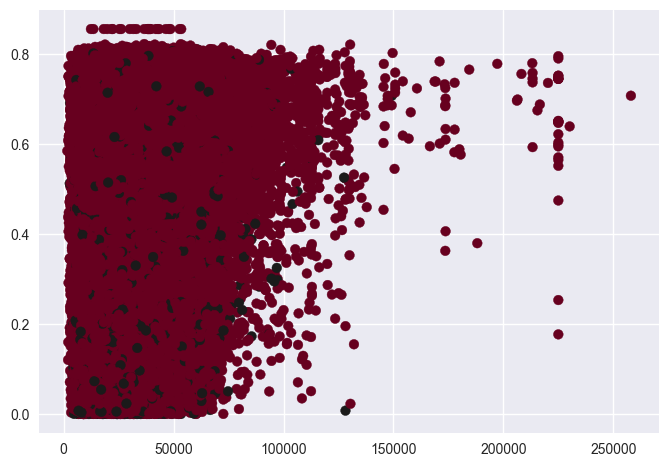

In [60]:
plt.scatter(x=df[feature_1], y=df[feature_2], c=df["y_true"], cmap="RdGy")

In [65]:
ser1.shape

(306835,)

In [66]:
x = ser1
y = ser2

X, Y = np.meshgrid(x, y)


MemoryError: Unable to allocate 701. GiB for an array with shape (306835, 306835) and data type float64